### Linear Regression - Feature columns: All Features || Prediction: Pickup count by Zone || Pickup counts Labels

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# FIX ME: Root dir as argument
root_dir = "../../../data/picklerCheckpoints/"
is_compressed = True;

In [3]:
!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install imblearn
import nbimporter
import Preprocessing.SpatialMapping as sm
import Preprocessing.Discretization as dis
import time
import math
import seaborn as sns
plt.rcParams.update({'font.size': 22})

Importing Jupyter notebook from D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\Preprocessing\SpatialMapping.ipynb


You should consider upgrading via the 'D:\python\python.exe -m pip install --upgrade pip' command.


Importing Jupyter notebook from D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\commons\utility\pickle_util.ipynb
Importing Jupyter notebook from D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\Preprocessing\DataEnrichment.ipynb
Importing Jupyter notebook from D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\Preprocessing\Discretization.ipynb


In [4]:
data = sm.run(['apr', 'may', 'jun', 'jul', 'aug'])

Data for the month :apr Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-apr14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-apr14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Data for the month :may Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-may14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-may14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Data for the month :jun Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file

In [5]:
df = data.copy()
columns = ['datetime', 'zone', 'weatherCondition', 'humidity', 'pressure', 'temperature', 'windDirection', 'windSpeed', 'holiday']

In [6]:
df2 = df[columns]
df2g = dis.encode(df2, ['zone', 'weatherCondition', 'holiday'])
df2g = df2.groupby(columns).size().reset_index(name='counts')
df2g['datetime'] = pd.to_datetime(df2g['datetime'], format='%m-%d-%Y:%H').apply(lambda x: time.mktime(x.timetuple()))

D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\Preprocessing\Discretization.ipynb:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "metadata": {},


Result Saved in ../data/encodedMappings/zone.p
Result Saved in ../data/encodedMappings/weatherCondition.p
Result Saved in ../data/encodedMappings/holiday.p


In [7]:
from sklearn.preprocessing import MinMaxScaler
counts = df2g['counts'].copy()
datetime = df2g['datetime'].copy()

In [8]:
df2g

,datetime,zone,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,counts
0,1.396291e+09,10,15,40.0,1016.0,282.96,330.0,5.0,1,3
1,1.396291e+09,11,15,40.0,1016.0,282.96,330.0,5.0,1,1
2,1.396291e+09,14,15,40.0,1016.0,282.96,330.0,5.0,1,2
3,1.396291e+09,22,15,40.0,1016.0,282.96,330.0,5.0,1,1
4,1.396291e+09,25,15,40.0,1016.0,282.96,330.0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...
486661,1.409506e+09,251,10,88.0,1015.0,298.53,0.0,2.0,2,3
486662,1.409506e+09,254,10,88.0,1015.0,298.53,0.0,2.0,2,5
486663,1.409506e+09,255,10,88.0,1015.0,298.53,0.0,2.0,2,7
486664,1.409506e+09,256,10,88.0,1015.0,298.53,0.0,2.0,2,6


In [9]:
# bins = [0, 10, 50, np.inf]
# names = ['low', 'med', 'high']

df2g['label'] = df2g['counts']

In [10]:
# df2g = dis.encode(df2g, ['label'])

In [11]:
# class0, class1, class2 = df2g['label'].value_counts()

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=101)

In [13]:
x_ros, y_ros = ros.fit_resample(df2g[columns], df2g['label'])
df3 = x_ros
df3['label'] = y_ros

In [14]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df3) 
df3.loc[:,:] = scaled_values
df3['counts'] = counts
df3['datetime'] = datetime

In [15]:
x_ros

,datetime,zone,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,label,counts
0,1.396291e+09,0.046875,0.681818,0.595506,0.560976,0.686562,0.000000,0.083333,0.0,0.000000,3
1,1.396291e+09,0.335938,0.227273,0.808989,0.195122,0.786596,0.472222,0.250000,0.0,0.001786,1
2,1.396291e+09,0.550781,0.136364,0.303371,0.853659,0.000000,0.083333,0.333333,0.0,0.003571,2
3,1.396291e+09,0.000000,0.681818,0.337079,0.292683,0.619206,0.944444,0.250000,0.0,0.005357,1
4,1.396291e+09,0.191406,0.136364,0.561798,0.146341,0.125375,0.861111,0.333333,0.0,0.007143,1
...,...,...,...,...,...,...,...,...,...,...,...
387,1.396312e+09,0.601562,0.318182,0.977528,0.902439,0.178515,0.283333,0.416667,0.0,0.864286,1
388,1.396312e+09,0.601562,0.454545,0.932584,0.170732,0.734245,0.277778,0.166667,0.0,0.912500,8
389,1.396312e+09,0.601562,0.227273,0.617978,0.195122,0.835945,0.000000,0.166667,0.0,0.919643,2
390,1.396312e+09,0.601562,0.454545,0.617978,0.170732,0.838946,0.777778,0.333333,0.0,0.964286,1


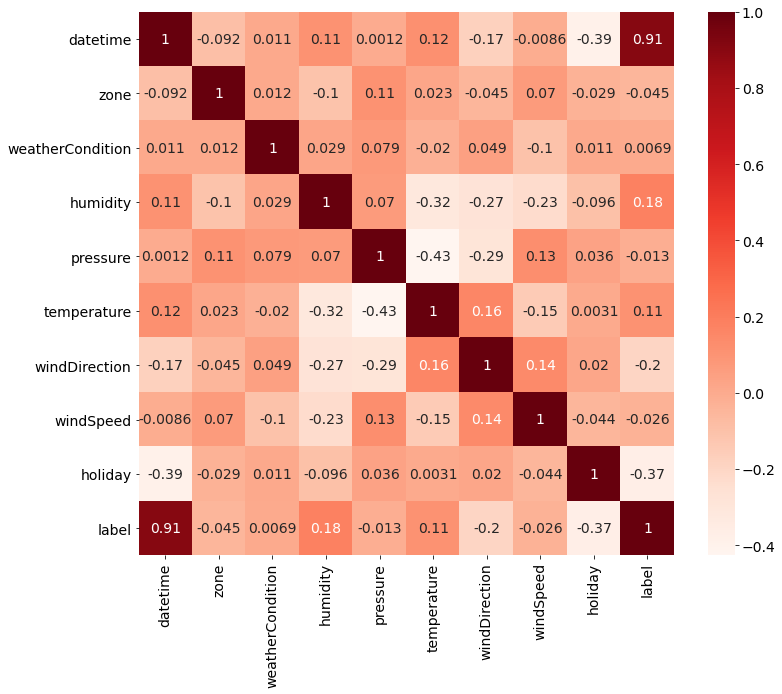

In [16]:
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 14})
corrCols = columns.copy()
corrCols.append('label')
cor = df3[corrCols].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('LinearRegression/LR-2-Correlation.png')
plt.show()

In [17]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

datetime    0.909276
label       1.000000
Name: label, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split( df3[columns], df3['label'], test_size=0.33, random_state=100)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [21]:
model = LinearRegression()
startTr = int(round(time.time() * 1000))
trained = model.fit(X_train, y_train)
endTr = int(round(time.time() * 1000))

In [22]:
startTe = int(round(time.time() * 1000))
x_predict = model.predict(X_test)
endTe = int(round(time.time() * 1000))

In [23]:
testDf = pd.DataFrame(X_test, columns=columns)
testDf['label'] = y_test
testDf.loc[:,:] = scaler.inverse_transform(testDf)
predictedDf = pd.DataFrame(X_test, columns=columns)
predictedDf['label'] = x_predict
predictedDf.loc[:,:] = scaler.inverse_transform(predictedDf)
predictedDf['label'] = predictedDf['label'].astype(int)

In [24]:
y_test = testDf['label'].astype(int)
x_predict = predictedDf['label']

In [25]:
from sklearn import metrics

In [26]:
print(metrics.mean_absolute_error(y_test, x_predict))
print(metrics.mean_squared_error(y_test, x_predict))
print(metrics.r2_score(y_test, x_predict))

38.676923076923075
2391.9846153846156
0.843511611373138


In [27]:
from sklearn.metrics import classification_report

In [28]:
report = classification_report(y_test, x_predict)
print(report)

              precision    recall  f1-score   support

         -29       0.00      0.00      0.00         0
         -26       0.00      0.00      0.00         0
         -21       0.00      0.00      0.00         0
         -19       0.00      0.00      0.00         0
         -15       0.00      0.00      0.00         0
         -10       0.00      0.00      0.00         0
          -9       0.00      0.00      0.00         0
          -6       0.00      0.00      0.00         0
          -5       0.00      0.00      0.00         0
          -4       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00    

D:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-sc

In [29]:
# report = classification_report(y_testdf['label'],  x_predictdf['label'])
# print(report)

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2)

In [32]:
pca.fit(X_train)

PCA(n_components=2)

In [33]:
print(pca.explained_variance_ratio_)

[9.99999990e-01 2.28603952e-09]


In [34]:
print(pca.singular_values_)

[1.09872845e+05 5.25330046e+00]


In [35]:
transformed = pd.DataFrame(pca.fit_transform(X_test))


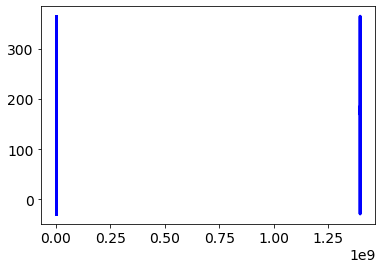

In [36]:
plt.plot(X_test, x_predict, color='blue', linewidth=3)

In [37]:
X_test

,datetime,zone,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday
124,1.396301e+09,0.289062,0.454545,0.955056,0.195122,0.521507,0.494444,0.000000,0.0
140,1.396301e+09,0.605469,0.409091,0.505618,0.463415,0.627209,0.527778,0.333333,0.0
276,1.396309e+09,0.601562,0.000000,0.314607,0.243902,0.631877,0.550000,0.083333,0.0
252,1.396309e+09,0.601562,0.000000,0.382022,0.536585,0.452818,0.333333,0.333333,0.0
326,1.396309e+09,0.601562,0.409091,0.494382,0.560976,0.482161,0.000000,0.166667,0.0
...,...,...,...,...,...,...,...,...,...
19,1.396291e+09,1.000000,0.727273,0.606742,0.097561,0.075692,0.861111,0.250000,0.0
26,1.396291e+09,0.253906,0.454545,0.752809,0.439024,0.576192,0.516667,0.083333,0.0
297,1.396309e+09,0.601562,0.409091,0.797753,0.365854,0.336779,0.222222,0.250000,0.0
35,1.396291e+09,0.683594,0.681818,0.696629,0.317073,0.669890,0.527778,0.250000,1.0


In [38]:
len(x_predict)

130

No handles with labels found to put in legend.


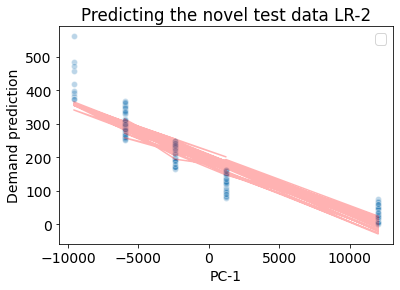

In [39]:
plt.scatter(transformed[0], y_test, edgecolors='w', alpha=0.3)
plt.plot(transformed[0], x_predict, color='r', alpha=0.3)
plt.legend()
plt.xlabel('PC-1')
plt.ylabel('Demand prediction')
plt.title('Predicting the novel test data LR-2')
plt.savefig('LinearRegression/LR-2.png')
plt.show()

In [40]:
print("Training time: = %3d" %(endTr-startTr))

Training time: =   8


In [41]:
print("Testing time: = %3d" %(endTe-startTe))

Testing time: =   3
